<a href="https://colab.research.google.com/github/SchachtmanLab/Transgenic-sorghum-sorgoleone/blob/master/%5BCT_SOLUTION_20250103%5D_4_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data exploration with DataFrames, cont.

<font color = '#ed865c' size = 4>**Make sure to press the play button to run the cell below: this will re-load the datasets and functions that we worked on during the last section.**</font>

In [ ]:
#@title
# make sure to run this cell to import the external files we need for today
# and load in the appropriate packages
!git clone https://github.com/ccbskillssem/pythonbootcamp.git

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

alleles = pd.read_table('/content/pythonbootcamp/day_4/alleles.tsv')
clinvar = pd.read_table('/content/pythonbootcamp/day_4/clinvar.tsv')

Cloning into 'pythonbootcamp'...
remote: Enumerating objects: 307, done.
remote: Counting objects: 100% (209/209), done.
remote: Compressing objects: 100% (172/172), done.
remote: Total 307 (delta 119), reused 82 (delta 37), pack-reused 98 (from 1)
Receiving objects: 100% (307/307), 95.58 MiB | 15.71 MiB/s, done.
Resolving deltas: 100% (147/147), done.
Updating files: 100% (50/50), done.


## Changing labels

<font color = '#ed865c' size = 4>**Make sure to run the cell above before you begin: this will re-load the datasets and functions that we worked on during the last section.**</font>

### Row labels

Currently, the row labels for `alleles` are numeric, which makes it easy to index rows just as we did with arrays. However, it's also possible to use row *names* as labels, just as we do with columns.

To do this, we can select an existing column of the DataFrame and turn it into the row Index. However, it's **extremely** important that we make sure the candidate column contains only unique values: we wouldn't want to try and index a row name, only to retrieve multiple rows with the same name!

Series have a useful attribute called `.is_unique`, which is `True` if all values in the Series are unique. Given that columns of DataFrames are stored as Series, we can easily check our candidate columns.

In [ ]:
# try it out:
# print the .is_unique attribute of each column
# hint: remember for loops? try using a loop with the column labels
for i in alleles.columns:
  print(i + ":", alleles[i].is_unique)

chromosome: False
position: False
ID: True
reference: False
alternative: False
quality: False
filter: False
AF: False
AFR_AF: False
AMR_AF: False
EAS_AF: False
EUR_AF: False
SAS_AF: False


Great – looks like there's a candidate column for our row labels. We can now change `allele`'s row labels using the `.set_index()` method.

In [ ]:
# in this case, we're opting to update the variable

alleles = alleles.set_index('ID')
alleles.head()

,chromosome,position,reference,alternative,quality,filter,AF,AFR_AF,AMR_AF,EAS_AF,EUR_AF,SAS_AF
ID,,,,,,,,,,,,
rs4845883,1,11784770,A,G,94.0,PASS,0.933506,0.7617,0.9741,1.000,1.0,1.000
rs139412854,1,11784774,C,T,96.0,PASS,0.000200,0.0008,0.0000,0.000,0.0,0.000
rs548376994,1,11784812,A,G,98.0,PASS,0.000200,0.0000,0.0000,0.001,0.0,0.000
rs569782256,1,11784816,G,A,96.0,PASS,0.000200,0.0000,0.0000,0.001,0.0,0.000
rs537101792,1,11784829,G,A,95.0,PASS,0.000200,0.0000,0.0000,0.000,0.0,0.001


Excellent! As you can see, each row's `ID` value is now the row label. We can access each row using `.loc[]` and the corresponding `ID` label.

In [ ]:
alleles.loc['rs573303859']

,rs573303859
chromosome,13
position,100119866
reference,A
alternative,ATTAT
quality,93.0
filter,PASS
AF,0.001198
AFR_AF,0.0038
AMR_AF,0.0
EAS_AF,0.0


Row names can be convenient, but also cumbersome: for example, now that we've assigned `ID` as our row labels, all of the row labels are strings: thus, we can no longer slice multiple rows with `.loc[]`.

> If you really want to slice multiple rows *and* retain string-type row labels, you will need to use `.iloc[]` instead of `.loc[]`. `.iloc[]` is used to access columns/rows/slices/cells in a `numpy` array-like manner. You can read more about it [here](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#selection-by-position).

In [ ]:
# try it out:
# access the row labeled rs563299082
# and its chromosome, position, reference, and alternative values
alleles.loc['rs563299082', ["chromosome", "position", "reference", "alternative"]]

,rs563299082
chromosome,22
position,30628242
reference,C
alternative,A


If you end up wanting to revert back to the standard 0-index numeric row labels, you can use the `.reset_index()` method to convert the row names back to a regular column.

In [ ]:
# let's return alleles to its original state

alleles = alleles.reset_index()
alleles.head()

,ID,chromosome,position,reference,alternative,quality,filter,AF,AFR_AF,AMR_AF,EAS_AF,EUR_AF,SAS_AF
0,rs4845883,1,11784770,A,G,94.0,PASS,0.933506,0.7617,0.9741,1.000,1.0,1.000
1,rs139412854,1,11784774,C,T,96.0,PASS,0.000200,0.0008,0.0000,0.000,0.0,0.000
2,rs548376994,1,11784812,A,G,98.0,PASS,0.000200,0.0000,0.0000,0.001,0.0,0.000
3,rs569782256,1,11784816,G,A,96.0,PASS,0.000200,0.0000,0.0000,0.001,0.0,0.000
4,rs537101792,1,11784829,G,A,95.0,PASS,0.000200,0.0000,0.0000,0.000,0.0,0.001


### Column labels
In the case that we want to replace column labels, we can use the `.rename()` method, which is the equivalent of `.replace()` for column labels. Just as we showed you before, the easiest way to do this is to provide a dictionary of target and substitute labels.

For example, let's consider `reference` and `alternative`, which are commonly shortened to `REF` and `ALT` in genomic file formats. Changing the column labels while maintaining the column content is a single-line operation:

In [ ]:
# rename reference and alternative to REF and ALT for all rows

alleles.rename({'reference': 'REF',
                 'alternative': 'ALT'}, axis = 'columns').head()

,ID,chromosome,position,REF,ALT,quality,filter,AF,AFR_AF,AMR_AF,EAS_AF,EUR_AF,SAS_AF
0,rs4845883,1,11784770,A,G,94.0,PASS,0.933506,0.7617,0.9741,1.000,1.0,1.000
1,rs139412854,1,11784774,C,T,96.0,PASS,0.000200,0.0008,0.0000,0.000,0.0,0.000
2,rs548376994,1,11784812,A,G,98.0,PASS,0.000200,0.0000,0.0000,0.001,0.0,0.000
3,rs569782256,1,11784816,G,A,96.0,PASS,0.000200,0.0000,0.0000,0.001,0.0,0.000
4,rs537101792,1,11784829,G,A,95.0,PASS,0.000200,0.0000,0.0000,0.000,0.0,0.001


## Sorting by column(s)
There's no way to sugar-coat it: there was no intuitive way for us to sort arrays by specific columns in `numpy`.

With `pandas`, the `.sort_values()` method allows us to sort a DataFrame/Series with the following inputs:
* A single column name, or a list of column names
* The `ascending` parameter, which takes a single Boolean value or a list of Boolean values (corresponding to the list of column names).
  * `True` will sort by lowest to highest (ascending).
  * `False` will sort by highest to lowest (descending).

In [ ]:
# let's sort AFR_AF by highest to lowest frequency

alleles.sort_values("AFR_AF", ascending=False).head()

,ID,chromosome,position,reference,alternative,quality,filter,AF,AFR_AF,AMR_AF,EAS_AF,EUR_AF,SAS_AF
73291,rs1898461,10,123051473,C,G,96.0,PASS,0.964457,1.0,0.9769,0.8621,0.9861,0.9908
45621,rs1340962,6,69854405,G,A,96.0,PASS,0.999201,1.0,0.9942,1.0000,1.0000,1.0000
138728,rs11464250,21,36866131,T,TA,92.0,PASS,1.000000,1.0,1.0000,1.0000,1.0000,1.0000
138669,rs59273667,21,36863854,GT,G,94.0,PASS,1.000000,1.0,1.0000,1.0000,1.0000,1.0000
32517,rs4835234,4,145602081,C,T,95.0,PASS,0.999800,1.0,1.0000,1.0000,0.9990,1.0000


⏸ **Exercise 1** Try sorting `alleles` by *all three* of the following columns:
* `AFR_AF`, from highest to lowest.
* `AMR_AF`, from lowest to highest.
* `EAS_AF`, from highest to lowest.

In [ ]:
### write your code below ###
alleles.sort_values(['AFR_AF', 'AMR_AF', 'EAS_AF'], ascending=[False, True, False])

,chromosome,position,ID,reference,alternative,quality,filter,AF,AFR_AF,AMR_AF,EAS_AF,EUR_AF,SAS_AF
136173,21,36782174,rs4816549,G,A,94.0,PASS,0.984625,1.0,0.9741,1.0000,0.9642,0.9765
73071,10,123043484,rs4359143,C,T,94.0,PASS,0.964657,1.0,0.9769,0.8631,0.9861,0.9908
73113,10,123045345,rs57005199,AT,A,97.0,PASS,0.964657,1.0,0.9769,0.8631,0.9861,0.9908
73186,10,123047712,rs4447108,G,T,96.0,PASS,0.964657,1.0,0.9769,0.8631,0.9861,0.9908
73212,10,123048682,rs10902867,G,A,94.0,PASS,0.964657,1.0,0.9769,0.8631,0.9861,0.9908
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20435,2,210628361,rs4673539,G,A,94.0,PASS,0.029353,0.0,0.1470,0.0397,0.0050,0.0000
99828,13,100128455,rs150847633,G,T,93.0,PASS,0.022364,0.0,0.1513,0.0069,0.0000,0.0000
19542,2,210592732,rs16844641,A,G,96.0,PASS,0.057308,0.0,0.1571,0.1647,0.0089,0.0031
56869,6,158113839,rs146471537,C,T,97.0,PASS,0.028155,0.0,0.2003,0.0000,0.0000,0.0020


## Adding columns

We can easily create new columns by simply assigning a new column name and contents to a DataFrame.

In [ ]:
# let's sample some rows with .sample()
# using 2024 as our seed value

some_alleles = alleles.sample(n = 5, random_state = 2024)
some_alleles

,ID,chromosome,position,reference,alternative,quality,filter,AF,AFR_AF,AMR_AF,EAS_AF,EUR_AF,SAS_AF
51950,rs574875069,6,80308094,A,G,95.0,PASS,0.000200,0.0008,0.0000,0.0,0.0000,0.0000
105482,rs565080472,13,100332270,G,T,93.0,PASS,0.000200,0.0008,0.0000,0.0,0.0000,0.0000
31588,rs565179676,4,108005855,G,A,92.0,PASS,0.000599,0.0000,0.0000,0.0,0.0000,0.0031
143874,rs550618366,21,46142330,G,A,94.0,PASS,0.000399,0.0015,0.0000,0.0,0.0000,0.0000
44323,rs141567447,6,69808224,G,A,94.0,PASS,0.009784,0.0015,0.0173,0.0,0.0219,0.0133


In [ ]:
some_alleles['sample_col'] = 0 # a new column full of zeros
some_alleles['exp'] = "exp_1"
some_alleles

,ID,chromosome,position,reference,alternative,quality,filter,AF,AFR_AF,AMR_AF,EAS_AF,EUR_AF,SAS_AF,sample_col,exp
51950,rs574875069,6,80308094,A,G,95.0,PASS,0.000200,0.0008,0.0000,0.0,0.0000,0.0000,0,exp_1
105482,rs565080472,13,100332270,G,T,93.0,PASS,0.000200,0.0008,0.0000,0.0,0.0000,0.0000,0,exp_1
31588,rs565179676,4,108005855,G,A,92.0,PASS,0.000599,0.0000,0.0000,0.0,0.0000,0.0031,0,exp_1
143874,rs550618366,21,46142330,G,A,94.0,PASS,0.000399,0.0015,0.0000,0.0,0.0000,0.0000,0,exp_1
44323,rs141567447,6,69808224,G,A,94.0,PASS,0.009784,0.0015,0.0173,0.0,0.0219,0.0133,0,exp_1


---
⏸ **Exercise 2 (No coding)** What happens when you change the seed value of a random sampler (like `.sample()`)? What happens if you don't have a seed value specified?

Hint: One of the morning exercises might help you answer this question.

---

Next, we can also assign new columns by explicitly providing a column label and a "definition" for the column.

In [ ]:
# let's reuse some_alleles
# creating a new column that contains the *reference* allele frequency
# this takes advantage of numpy broadcasting

some_alleles['reference_AF'] = 1 - some_alleles['AF']
some_alleles

,ID,chromosome,position,reference,alternative,quality,filter,AF,AFR_AF,AMR_AF,EAS_AF,EUR_AF,SAS_AF,sample_col,exp,reference_AF
51950,rs574875069,6,80308094,A,G,95.0,PASS,0.000200,0.0008,0.0000,0.0,0.0000,0.0000,0,exp_1,0.999800
105482,rs565080472,13,100332270,G,T,93.0,PASS,0.000200,0.0008,0.0000,0.0,0.0000,0.0000,0,exp_1,0.999800
31588,rs565179676,4,108005855,G,A,92.0,PASS,0.000599,0.0000,0.0000,0.0,0.0000,0.0031,0,exp_1,0.999401
143874,rs550618366,21,46142330,G,A,94.0,PASS,0.000399,0.0015,0.0000,0.0,0.0000,0.0000,0,exp_1,0.999601
44323,rs141567447,6,69808224,G,A,94.0,PASS,0.009784,0.0015,0.0173,0.0,0.0219,0.0133,0,exp_1,0.990216


Lastly, the `.map()` method allows us to **mutate** new columns based on values of existing columns. This is useful for adding categorical or Boolean columns without overwriting existing columns.

In [ ]:
alleles['filter'].head()

,filter
0,PASS
1,PASS
2,PASS
3,PASS
4,PASS


In [ ]:
# let's mutate a new column called filter_pass
# instead of replacing the values of filter

alleles['filter_pass'] = alleles['filter'].map({'PASS': True,
                                      'LowQ': False})
alleles.head()

,ID,chromosome,position,reference,alternative,quality,filter,AF,AFR_AF,AMR_AF,EAS_AF,EUR_AF,SAS_AF,filter_pass
0,rs4845883,1,11784770,A,G,94.0,PASS,0.933506,0.7617,0.9741,1.000,1.0,1.000,True
1,rs139412854,1,11784774,C,T,96.0,PASS,0.000200,0.0008,0.0000,0.000,0.0,0.000,True
2,rs548376994,1,11784812,A,G,98.0,PASS,0.000200,0.0000,0.0000,0.001,0.0,0.000,True
3,rs569782256,1,11784816,G,A,96.0,PASS,0.000200,0.0000,0.0000,0.001,0.0,0.000,True
4,rs537101792,1,11784829,G,A,95.0,PASS,0.000200,0.0000,0.0000,0.000,0.0,0.001,True


## Dropping columns

We can use the `.drop()` method to drop columns as easily as we created them. This can be handy if you end up with too many columns during your exploration, or if you simply don't need some of the columns that came with your dataset.

In [ ]:
# getting rid of filter_pass
# removing it from all rows in the dataframe

alleles = alleles.drop('filter_pass', axis='columns')
alleles

,ID,chromosome,position,reference,alternative,quality,filter,AF,AFR_AF,AMR_AF,EAS_AF,EUR_AF,SAS_AF
0,rs4845883,1,11784770,A,G,94.0,PASS,0.933506,0.7617,0.9741,1.000,1.000,1.0000
1,rs139412854,1,11784774,C,T,96.0,PASS,0.000200,0.0008,0.0000,0.000,0.000,0.0000
2,rs548376994,1,11784812,A,G,98.0,PASS,0.000200,0.0000,0.0000,0.001,0.000,0.0000
3,rs569782256,1,11784816,G,A,96.0,PASS,0.000200,0.0000,0.0000,0.001,0.000,0.0000
4,rs537101792,1,11784829,G,A,95.0,PASS,0.000200,0.0000,0.0000,0.000,0.000,0.0010
...,...,...,...,...,...,...,...,...,...,...,...,...,...
146577,rs187829200,22,30628237,G,C,100.0,PASS,0.000200,0.0000,0.0000,0.001,0.000,0.0000
146578,rs563299082,22,30628242,C,A,97.0,PASS,0.000599,0.0000,0.0000,0.000,0.000,0.0031
146579,rs73398315,22,30628249,C,G,100.0,PASS,0.066494,0.2428,0.0159,0.000,0.001,0.0000
146580,rs370947798,22,30628260,C,T,100.0,PASS,0.000200,0.0008,0.0000,0.000,0.000,0.0000


## Grouping

We've now reached the operations that are *only* possible in `pandas`. **Grouped operations** partition the dataset into subsets based on the value of a given column or columns prior to operation.

There are two major steps in performing grouped operations:
1. **Splitting**: Splitting data into groups.
2. **Applying**: Applying a function across separate groups. (This is where vectorization is helpful!)

We can accomplish the first step using the `.group_by()` method, which takes one or more column labels.

In [ ]:
alleles[alleles["filter"] == "LowQ"]
alleles[alleles["filter"] == "PASS"]

,ID,chromosome,position,reference,alternative,quality,filter,AF,AFR_AF,AMR_AF,EAS_AF,EUR_AF,SAS_AF
0,rs4845883,1,11784770,A,G,94.0,PASS,0.933506,0.7617,0.9741,1.000,1.000,1.0000
1,rs139412854,1,11784774,C,T,96.0,PASS,0.000200,0.0008,0.0000,0.000,0.000,0.0000
2,rs548376994,1,11784812,A,G,98.0,PASS,0.000200,0.0000,0.0000,0.001,0.000,0.0000
3,rs569782256,1,11784816,G,A,96.0,PASS,0.000200,0.0000,0.0000,0.001,0.000,0.0000
4,rs537101792,1,11784829,G,A,95.0,PASS,0.000200,0.0000,0.0000,0.000,0.000,0.0010
...,...,...,...,...,...,...,...,...,...,...,...,...,...
146577,rs187829200,22,30628237,G,C,100.0,PASS,0.000200,0.0000,0.0000,0.001,0.000,0.0000
146578,rs563299082,22,30628242,C,A,97.0,PASS,0.000599,0.0000,0.0000,0.000,0.000,0.0031
146579,rs73398315,22,30628249,C,G,100.0,PASS,0.066494,0.2428,0.0159,0.000,0.001,0.0000
146580,rs370947798,22,30628260,C,T,100.0,PASS,0.000200,0.0008,0.0000,0.000,0.000,0.0000


In [ ]:
# this method doesn't show a visible output, it creates a groupby object

alleles.groupby('filter')

In order to see the effect of splitting with `.groupby()`, we need to chain `.groupby()` with a function that we want applied to our groups.

For example, let's say that we want to know the average quality score of alleles that pass (or don't pass) filter.

In [ ]:
alleles.groupby('filter')['quality'].mean()

,quality
filter,
LowQ,88.241745
PASS,95.180958


## Merging (review)

This morning we discussed merging two datasets: `alleles` and `clinvar`. Merging is a very useful operation that we'll be using in tomorrow's final mini-project.

Once again, merge `alleles` and `clinvar` so that we have a single DataFrame called `merged`, which contains only the alleles present in both of the datsets.

In [ ]:
# try it out:
# merge alleles and clinvar as you did earlier today into a 'merged' dataframe: inner join on the ID columns
merged = pd.merge(alleles, clinvar, how='inner', on='ID')
#sanity check
print("Shape of alleles df: ", alleles.shape)
print("Shape of clinvar df: ", clinvar.shape)
print("Shape of merged df: ", merged.shape)

Shape of alleles df:  (146582, 13)
Shape of clinvar df:  (747778, 10)
Shape of merged df:  (3749, 22)


## Exporting

This is our final lesson in `pandas`: hooray!

We've learned a lot about how to parse and manipulate our DataFrames. At some point in the near future, you'll likely want to save the results of your operations.

The `.to_csv()` method allows us to easily export our DataFrame to a `.csv` file. As the name implies, it will save a DataFrame to a `.csv` file, given a string (file name).

Let's go ahead and cap off our lecture by exporting `merged` to a file called `merged.csv`.

In [ ]:
# Reminder! Use this bash command to know which directory you are at to track location of saved files
!pwd

/content


In [ ]:
merged.to_csv('my_first_merged.csv')

In [ ]:
# Try it out
# Read back in that same file to see how it was saved
merged = pd.read_csv('my_first_merged.csv')

If you open the `Files` menu (left panel, folder icon), you'll see that the `merged.csv` file is now available.
___
**CAUTION**: Files that you save while using Colab are not retained after you close the notebook, as they only exist in Colab's temporary **session storage**. If you generate files and wish to keep them, make sure to download your files (with the same three dots menu) before you exit Colab.
___

That's it for our introduction to `pandas`! We hope you're starting to get a feel for how immensely powerful `pandas` can be. (Perhaps too powerful for a single bootcamp lecture...)

* To learn more about DataFrame methods, click here for the DataFrame documentation.
* To learn more about Series methods, click here for the DataFrame documentation.
* To learn about other common `pandas` routines, refer to the official `pandas` cookbook [here](https://pandas.pydata.org/docs/user_guide/cookbook.html). (No pandas were harmed in the making of this cookbook.)


# << `Exercises` >>

⏸ **Exercise 3a**: Just like with arrays, we can use the `.isna()` method to detect missing values in a DataFrame. Use this to identify all missing values in `clinvar`.

In [ ]:
### write your code below ###
clinvar.isna()

,chromosome,position,reference,alternative,clinical_significance,ID,gene,molecular_consequence,disease,pathogenic_indicator
0,False,False,False,False,False,True,False,False,False,False
1,False,False,False,False,False,True,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,True,False,False,False,False
4,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
747773,False,False,False,False,False,False,False,False,False,False
747774,False,False,False,False,False,False,False,False,False,False
747775,False,False,False,False,False,False,False,False,False,False
747776,False,False,False,False,False,False,False,False,False,False


⏸ **Exercise 3b** Let's chain together some `pandas` methods! Which columns of `clinvar` are missing values?

*Hint*: The `.any()` method returns a `True` if any of the values in the Series or array are `True`.

In [ ]:
### write your code below ###
clinvar.isna().any(axis = 0)

,0
chromosome,False
position,False
reference,False
alternative,True
clinical_significance,True
ID,True
gene,True
molecular_consequence,True
disease,True
pathogenic_indicator,False


⏸ **Exercise 3c**: Find the total number of missing values in each column of `clinvar`.

*Hint*: Recall that `False` Booleans are considered equivalent to `0`, and `True` values are considered equivalent to `1`.

In [ ]:
### write your code below ###
clinvar.isna().sum(axis = 0)

,0
chromosome,0
position,0
reference,0
alternative,599
clinical_significance,571
ID,147108
gene,214
molecular_consequence,14637
disease,571
pathogenic_indicator,0


⏸ **Exercise 3d**: Which rows in `clinvar` are incomplete? Filter `clinvar` to show these rows.

*Hint*: You can change the axis along which `.any()` operates.

In [ ]:
### write your code below ###
clinvar[clinvar.isna().any(axis = 1) == True]

,chromosome,position,reference,alternative,clinical_significance,ID,gene,molecular_consequence,disease,pathogenic_indicator
0,1,930188,G,A,Uncertain_significance,NaN,SAMD11,missense_variant,not_provided,0
1,1,930203,C,T,Uncertain_significance,NaN,SAMD11,missense_variant,not_provided,0
3,1,930275,T,G,Uncertain_significance,NaN,SAMD11,missense_variant,not_provided,0
4,1,930336,G,A,Uncertain_significance,NaN,SAMD11,missense_variant,not_provided,0
5,1,931039,A,G,Uncertain_significance,NaN,SAMD11,synonymous_variant,not_provided,0
...,...,...,...,...,...,...,...,...,...,...
747758,22,50730998,C,A,Pathogenic,NaN,SHANK3,missense_variant,22q13.3_deletion_syndrome,1
747762,22,50731088,C,T,Likely_pathogenic,NaN,SHANK3,nonsense,not_provided,0
747763,22,50731118,T,C,Likely_pathogenic,NaN,SHANK3,missense_variant,not_provided,0
747767,22,50731197,TAGAA,T,Uncertain_significance,NaN,SHANK3,frameshift_variant,22q13.3_deletion_syndrome,0


⏸ **Exercise 4a** We're now going to move to data cleaning.

First, select rows in ```clinvar``` that have complete data (no missing values): save this filtered DataFrame to a variable called `clinvar_complete`. What are the dimensions of `clinvar_complete`?

In [ ]:
### write your code below ###
clinvar_complete = clinvar[clinvar.isna().any(axis = 1) == False]
#sanity check
print("Shape of original data df: ", clinvar.shape)
print("Shape of filtered data df: ", clinvar_complete.shape)

Shape of original data df:  (747778, 10)
Shape of filtered data df:  (585977, 10)


In [ ]:
# use this cell to check your work
clinvar_complete.isna().any()

,0
chromosome,False
position,False
reference,False
alternative,False
clinical_significance,False
ID,False
gene,False
molecular_consequence,False
disease,False
pathogenic_indicator,False


⏸ **Exercise 4b**: It seems like a significant number of `clinvar` rows contain missing values. Calculate the mean, median, and maximum number of missing values for `clinvar` rows.

*Hint*: This exercise uses the same principle as Exercise 3c.

In [ ]:
clinvar.head()

,chromosome,position,reference,alternative,clinical_significance,ID,gene,molecular_consequence,disease,pathogenic_indicator
0,1,930188,G,A,Uncertain_significance,NaN,SAMD11,missense_variant,not_provided,0
1,1,930203,C,T,Uncertain_significance,NaN,SAMD11,missense_variant,not_provided,0
2,1,930248,G,A,Likely_benign,rs41285790,SAMD11,missense_variant,not_provided,0
3,1,930275,T,G,Uncertain_significance,NaN,SAMD11,missense_variant,not_provided,0
4,1,930336,G,A,Uncertain_significance,NaN,SAMD11,missense_variant,not_provided,0


In [ ]:
### write your code below ###
print("per row:", clinvar.isna().sum(axis = 1))
print("mean:", clinvar.isna().sum(axis = 1).mean())
print("max:", clinvar.isna().sum(axis = 1).max())
print("median:", clinvar.isna().sum(axis = 1).median())

# mean, max, and median of missing values per row

per row: 0         1
1         1
2         0
3         1
4         1
         ..
747773    0
747774    0
747775    0
747776    0
747777    0
Length: 747778, dtype: int64
mean: 0.21891523954970593
max: 4
median: 0.0


⏸ **Exercise 4c**: The `.dropna()` method accomplishes what we did with Boolean filtering, but it allows for additional flexibility when filtering rows. Look up the documentation for `.dropna()`, then use it to select rows in `clinvar` that have no more than 2 NA values. Assign this DataFrame to `clinvar_partial`.

In [ ]:
### write your code below ###
clinvar_partial = clinvar.dropna(thresh = 8) #because there are 10 columns in total
clinvar_partial.shape

# Alternative way
clinvar[clinvar.isna().sum(axis=1) <= 2].shape

#sanity check
clinvar_partial.isna().sum(axis = 1).max()

2

⏸ **Exercise 4d**: How many rows remain compared to `clinvar_complete` and the original `clinvar` DataFrame?

In [ ]:
### write your code below ###
print("original dimensions:", clinvar.shape)
print("complete dimensions:", clinvar_complete.shape)
print("partial dimensions:", clinvar_partial.shape)

original dimensions: (747778, 10)
complete dimensions: (585977, 10)
partial dimensions: (747607, 10)


⏸ **Challenge**: Create a new DataFrame called `pathogenic` that contains only pathogenic variants.

*Hint*: The `clinical_significance` column contains several different strings with the substring `'pathogenic'`. How can you take advantage of this to filter `clinvar`? If you're not sure, check the morning notebook.)

In [ ]:
### write your code below ###
pathogenic = clinvar_complete[clinvar_complete["clinical_significance"].str.lower().str.contains("pathogenic")]
pathogenic

,chromosome,position,reference,alternative,clinical_significance,ID,gene,molecular_consequence,disease,pathogenic_indicator
125,1,1014143,C,T,Pathogenic,rs786201005,ISG15,nonsense,Immunodeficiency_38_with_basal_ganglia_calcifi...,1
138,1,1014316,C,CG,Pathogenic,rs672601345,ISG15,frameshift_variant,Immunodeficiency_38_with_basal_ganglia_calcifi...,1
141,1,1014359,G,T,Pathogenic,rs672601312,ISG15,nonsense,Immunodeficiency_38_with_basal_ganglia_calcifi...,1
159,1,1020239,G,C,Conflicting_interpretations_of_pathogenicity,rs201073369,AGRN,missense_variant,"Myasthenic_syndrome,_congenital,_8|not_specifi...",0
172,1,1022225,G,A,Pathogenic,rs756623659,AGRN,missense_variant,Congenital_myasthenic_syndrome,1
...,...,...,...,...,...,...,...,...,...,...
747764,22,50731130,G,T,Likely_pathogenic,rs1131691485,SHANK3,missense_variant,not_provided,0
747765,22,50731142,T,C,Likely_pathogenic,rs1131691469,SHANK3,missense_variant,not_provided,0
747766,22,50731143,G,A,Pathogenic,rs1603447383,SHANK3,nonsense,not_provided,1
747768,22,50731202,G,A,Likely_pathogenic,rs1555910944,SHANK3,missense_variant,not_provided,0


Find the number of pathogenic variants for each of three genes: `BRCA1`, `PAH`, and `CFTR`.

In [ ]:
### write your code below ###
count = pathogenic['gene'].value_counts()
result = count[count.index.isin(['BRCA1', 'PAH', 'CFTR'])]
result

,count
gene,
BRCA1,3201
CFTR,814
PAH,433


# [Optional] More about `pandas`

Are you excited about `pandas`? Like, really excited? Here's some extra info on techniques that may be useful to you in the future. (We're not including this in the main lecture, as there's already a ton to go through!)

We'll focus on the `merged` dataset, which we derived by merging together `alleles` and `clinvar`. All of the rows in `merged` represent alleles found in both datasets.

First, let's quickly inspect a couple of different things, just to get our bearings.

In [ ]:
# try it out:
# print the # of rows and cols in merged
# just to review how many alleles in alleles are also found in clinvar
merged.shape

(3749, 23)

In [ ]:
# try it out:
# view the first 10 rows of merged
merged.head(n=10)

,Unnamed: 0,ID,chromosome_x,position_x,reference_x,alternative_x,quality,filter,AF,AFR_AF,...,SAS_AF,chromosome_y,position_y,reference_y,alternative_y,clinical_significance,gene,molecular_consequence,disease,pathogenic_indicator
0,0,rs55740775,1,11786035,G,GT,92.0,PASS,0.951278,0.9221,...,0.9499,1,11786035,G,GT,Benign,MTHFR,intron_variant,"Neural_tube_defects,_folate-sensitive",0
1,1,rs55780505,1,11786602,ATTTT,A,94.0,PASS,0.777157,0.6180,...,0.7474,1,11786602,A,ATT,Uncertain_significance,MTHFR,intron_variant,"Neural_tube_defects,_folate-sensitive",0
2,2,rs55780505,1,11786602,ATTTT,A,94.0,PASS,0.777157,0.6180,...,0.7474,1,11786602,ATTTT,A,Likely_benign,MTHFR,intron_variant,"Neural_tube_defects,_folate-sensitive",0
3,3,rs55780505,1,11786602,ATTTT,A,94.0,PASS,0.777157,0.6180,...,0.7474,1,11786602,ATTTTTTTT,A,Uncertain_significance,MTHFR,intron_variant,"Neural_tube_defects,_folate-sensitive",0
4,4,rs547574100,1,11790673,C,T,89.0,LowQ,0.000200,0.0000,...,0.0010,1,11790673,C,T,Uncertain_significance,MTHFR,3_prime_UTR_variant,not_provided,0
5,5,rs45572531,1,11790692,C,T,97.0,PASS,0.002796,0.0106,...,0.0000,1,11790692,C,T,Benign/Likely_benign,MTHFR,synonymous_variant,Homocystinuria_due_to_methylene_tetrahydrofola...,0
6,6,rs35737219,1,11790693,G,A,92.0,PASS,0.004193,0.0015,...,0.0010,1,11790693,G,A,Benign,MTHFR,missense_variant,Homocystinuria_due_to_methylene_tetrahydrofola...,0
7,7,rs139586522,1,11790710,G,T,95.0,PASS,0.000799,0.0030,...,0.0000,1,11790710,G,T,Benign,MTHFR,synonymous_variant,Homocystinuria_due_to_methylene_tetrahydrofola...,0
8,8,rs200947520,1,11790719,G,T,92.0,PASS,0.000599,0.0000,...,0.0020,1,11790719,G,T,Benign,MTHFR,missense_variant,Homocystinuria_due_to_methylene_tetrahydrofola...,0
9,9,rs558230616,1,11790733,A,G,95.0,PASS,0.000200,0.0000,...,0.0010,1,11790733,A,G,Likely_benign,MTHFR,synonymous_variant,Homocystinuria_due_to_methylene_tetrahydrofola...,0


Let's quickly look at the column labels, just so we can have a list of the columns we might want to examine.

In [ ]:
# try it out:
# examine the column labels: how many are there, and what are they?
merged.columns

Index(['Unnamed: 0', 'ID', 'chromosome_x', 'position_x', 'reference_x',
       'alternative_x', 'quality', 'filter', 'AF', 'AFR_AF', 'AMR_AF',
       'EAS_AF', 'EUR_AF', 'SAS_AF', 'chromosome_y', 'position_y',
       'reference_y', 'alternative_y', 'clinical_significance', 'gene',
       'molecular_consequence', 'disease', 'pathogenic_indicator'],
      dtype='object')

Great! We can see that we have a good number of columns that derive from `clinvar`. There are also some duplicate columns, which are marked with the `_x` suffix to indicate that they derive from `alleles`, or the `_y` suffix to indicate that they derive from `clinvar`. You can adjust these suffixes using parameters in `pd.merge()`.

Let's examine some of the columns that may hold interesting categorical values:

In [ ]:
# try it out:
# find the unique values in the clinical_significance column
merged['clinical_significance'].unique()

array(['Benign', 'Uncertain_significance', 'Likely_benign',
       'Benign/Likely_benign', 'Benign,_other',
       'Conflicting_interpretations_of_pathogenicity', 'Pathogenic',
       'Conflicting_interpretations_of_pathogenicity,_other',
       'Likely_pathogenic', 'drug_response',
       'Pathogenic/Likely_pathogenic', 'not_provided',
       'Benign/Likely_benign,_other'], dtype=object)

In [ ]:
# try it out:
# find the unique values in the molecular_consequence column
merged['molecular_consequence'].unique()

array(['intron_variant', '3_prime_UTR_variant', 'synonymous_variant',
       'missense_variant', 'nonsense', 'no_sequence_alteration',
       '5_prime_UTR_variant', nan, 'genic_upstream_transcript_variant',
       'non-coding_transcript_variant', 'splice_donor_variant',
       'genic_downstream_transcript_variant', 'splice_acceptor_variant'],
      dtype=object)

Given that not everyone will be versed in disease genetics or molecular biology, here's a quick crash course on what these mean.

*clinical_significance* refers to the observed effect of the mutation on human health. This data is curated by clinicians and uploaded to the ClinVar database.

*molecular_consequence* refers to the consequence of a specific mutation on the gene product (protein) of the mutated gene. Not all mutations yield the same molecular_consequence, and some consequences are more dire than others: for example, *nonsense mutations* can result in a gene product that may not perform its biological function.

## Fun tricks: rolling window operations

This is a fun feature of `pandas` that may be interesting to people who work with longitudinal-type data, such as time series data or genomic coordinate-related data. It is *not* a must-know feature of `pandas`.

The `.rolling()` method for DataFrames takes a `window` parameter, which specifies the number of rows to use to create a *rolling (sliding) window* across the DataFrame. This can be used to methodically calculate summaries such as sliding window averages using a `for` loop. (Yes, this is a very specific trick!)

In [ ]:
# calculating a rolling window average of allele frequencies on the 21st chromosome
# using the alleles dataset, sorted by genomic position on the 21st chromosome

rolling_mean = []
for window in alleles[alleles['chromosome'] == 21].sort_values('position').rolling(window = 500):
  rolling_mean.append(window['AF'].mean()) # get the average allele freq in the rolling wondow

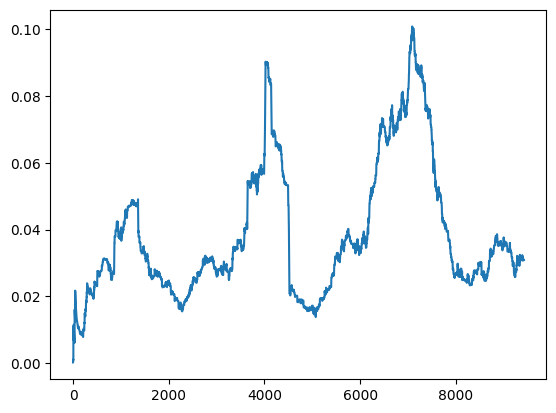

In [ ]:
# plotting the rolling mean of allele frequencies across chromosome 21
# plt.plot takes two arrays/lists: the first corresponds to x values, the second to y values
# below, we created "dummy" x values that match the length of rolling_mean
# (there are more robust ways to plot this rolling mean :) )

plt.plot(np.arange(0, len(rolling_mean)), rolling_mean)

Want to learn more fun `pandas` tricks? It's time for you to move on to the full documentation [here](https://pandas.pydata.org/docs/user_guide/index.html#user-guide). Go wild!